In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os
os.environ['KAGGLE_USERNAME']='laavanayadhawan'
os.environ['KAGGLE_KEY']='7bcdf39f3559d8bf9303a303a03ddc20'

In [5]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 99% 206M/207M [00:06<00:00, 21.6MB/s]
100% 207M/207M [00:06<00:00, 34.1MB/s]


In [6]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [7]:
main_dir ='/content/New Masks Dataset'
train_dir = os.path.join(main_dir, 'Train')
test_dir = os.path.join(main_dir, 'Test')
valid_dir = os.path.join(main_dir, 'Validation')
train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

In [8]:
train_mask_names=os.listdir(train_mask_dir)
print(train_mask_names[:10])
train_nomask_names=os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['1291.jpg', '0387.png', '0470.jpg', '1154.jpg', '0994.jpg', '0888.jpg', '1635.jpg', '0250.png', '1246.jpg', '1115.jpg']
['164.jpg', '172.jpg', '237.jpg', '290.jpg', '344.jpg', '152.jpg', '28.jpg', '214.jpg', '251.jpg', '208.jpg']


['/content/New Masks Dataset/Train/Mask/1291.jpg', '/content/New Masks Dataset/Train/Mask/0387.png', '/content/New Masks Dataset/Train/Mask/0470.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/0994.jpg', '/content/New Masks Dataset/Train/Mask/0888.jpg', '/content/New Masks Dataset/Train/Mask/1635.jpg', '/content/New Masks Dataset/Train/Mask/0250.png']
['/content/New Masks Dataset/Train/Non Mask/164.jpg', '/content/New Masks Dataset/Train/Non Mask/172.jpg', '/content/New Masks Dataset/Train/Non Mask/237.jpg', '/content/New Masks Dataset/Train/Non Mask/290.jpg', '/content/New Masks Dataset/Train/Non Mask/344.jpg', '/content/New Masks Dataset/Train/Non Mask/152.jpg', '/content/New Masks Dataset/Train/Non Mask/28.jpg', '/content/New Masks Dataset/Train/Non Mask/214.jpg']


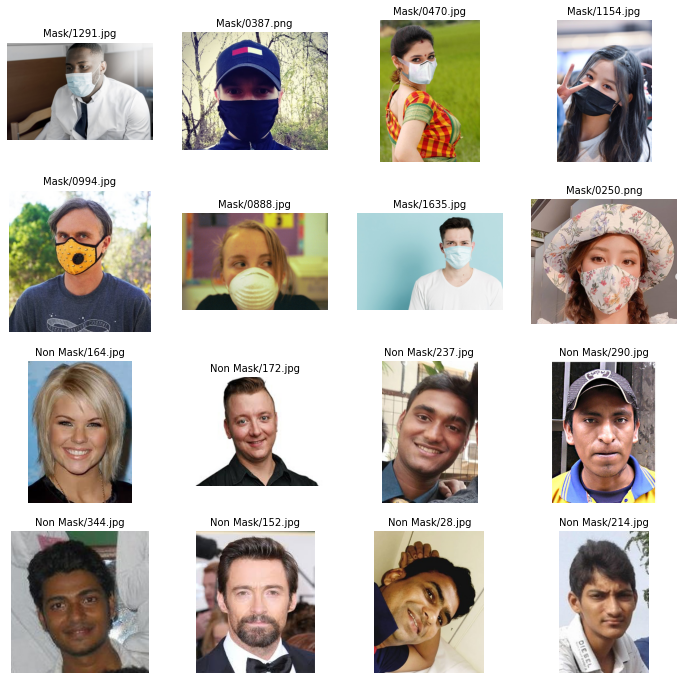

In [9]:
import matplotlib.image as mpimg
nrows=4
ncolomns=4
plt.figure(figsize=(12,12))
mask_pic=[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))


nomask_pic=[]
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)
merged_list= mask_pic+nomask_pic
for i in range(0,len(merged_list)):
  data=merged_list[i].split('/',4)[4]
  sp=plt.subplot(nrows,ncolomns,i+1)
  sp.axis('OFF')
  image=mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
plt.show()  

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 rotation_range=40,
                                 horizontal_flip=True
                                 ) 
test_datagen=ImageDataGenerator(rescale=1./255 ) 
validation_datagen=ImageDataGenerator(rescale=1./255 )

train_generator= train_datagen.flow_from_directory(train_dir, target_size=(150,150),batch_size=32, class_mode='binary')
test_generator= test_datagen.flow_from_directory(test_dir, target_size=(150,150),batch_size=32, class_mode='binary')
valid_generator= validation_datagen.flow_from_directory(valid_dir, target_size=(150,150),batch_size=32, class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [11]:
train_generator.class_indices


{'Mask': 0, 'Non Mask': 1}

In [12]:
train_generator.image_shape

(150, 150, 3)

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [14]:
model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer=Adam(lr=1e-3) )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(train_generator,epochs=30,validation_data=valid_generator)




Epoch 1/30
19/19 [==============================] - 24s 779ms/step - loss: 2.7527 - accuracy: 0.5567 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 14s 747ms/step - loss: 0.6597 - accuracy: 0.5650 - val_loss: 0.6841 - val_accuracy: 0.5654
Epoch 3/30
19/19 [==============================] - 14s 738ms/step - loss: 0.5020 - accuracy: 0.7750 - val_loss: 0.6204 - val_accuracy: 0.7059
Epoch 4/30
19/19 [==============================] - 14s 751ms/step - loss: 0.3951 - accuracy: 0.8333 - val_loss: 0.5831 - val_accuracy: 0.7288
Epoch 5/30
19/19 [==============================] - 14s 733ms/step - loss: 0.3955 - accuracy: 0.8683 - val_loss: 0.4415 - val_accuracy: 0.8333
Epoch 6/30
19/19 [==============================] - 14s 751ms/step - loss: 0.3390 - accuracy: 0.8783 - val_loss: 0.4045 - val_accuracy: 0.8399
Epoch 7/30
19/19 [==============================] - 14s 737ms/step - loss: 0.3048 - accuracy: 0.8917 - val_loss: 0.3684 - val_accuracy: 0.8431

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

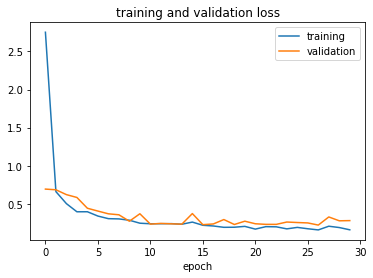

In [17]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('training and validation loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

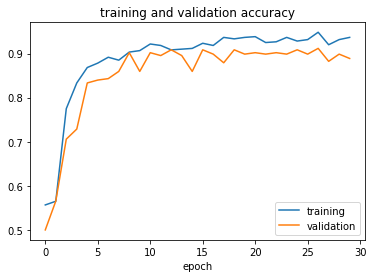

In [18]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('training and validation accuracy')
plt.xlabel('epoch')


In [29]:
test_loss, test_acc=model.evaluate(test_generator)
print('test loss :{} test accuracy:{}'.format(test_loss,test_acc))

4/4 [==============================] - 3s 736ms/step - loss: 0.2785 - accuracy: 0.8700
test loss :0.2784959673881531 test accuracy:0.8700000047683716


In [19]:
from google.colab import files
from keras.preprocessing import image
uploaded =files.upload()
for fname in uploaded.keys():
  img_path= '/content/' + fname
  img=image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images, axis=0)
  predection=model.predict(images)
  print(fname)
  if predection==0:
    print('mask')
  else:
    print('no mask')

Saving mask.jpeg to mask (3).jpeg
Saving nomask.jpeg to nomask (2).jpeg
mask.jpeg
no mask
nomask.jpeg
no mask


In [21]:
model.save('model.h5')